# Titanic

### Rafael Takata García

Import all the libraries that we are going to use.

In [38]:
import pandas as pd
import seaborn as sns

Created the dataframes

In [39]:
df_train = pd.read_csv('../data/raw/train.csv', index_col = 0)
df_test = pd.read_csv('../data/raw/test.csv')

In [40]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1st MODEL TRY (Guess it with the mean)
$$
y = f\theta(x) = \mu(x)
$$

In [41]:
y_mean = round(df_train['Survived'].mean())
print(f'Mean of y: {y_mean}')

Mean of y: 0


In [42]:
df_test['Survived'] = y_mean
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [43]:
df_test[['PassengerId', 'Survived']].to_csv(path_or_buf= '../data/processed/test_mean_sub.csv',  index = False)

With this try, I got a 0.622 Score

In [44]:
#Restart df_test
df_test = df_test.drop('Survived', axis = 1)

### 2nd MODEL TRY (KNN)

First, we have to clean the data 

In [45]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


At this moment, I don't know how to manage this data so I'm going to drop it in order to make it easier to standarize. I am going to create antoher dataframe to make sure that we don't lose that information.

In [46]:
df_val = df_train.drop(['Name', 'Ticket', 'Cabin'], axis= 1) #If we change the format on one dataset, we need to do it on test too
df_testk = df_test.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

We are going to change the variable `Sex` and define male as 0 and female as 1
Also the variable `Embarked` will be changed, S with 0, C with 1 and Q with 2

In [47]:
#I converted the to type int
df_val['Sex'] = df_val['Sex'].map({'male': 0, 'female': 1})
df_val['Embarked'] = df_val['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_val[['Embarked', 'Sex']].head()

,Embarked,Sex
PassengerId,,
1,0.0,0
2,1.0,1
3,0.0,1
4,0.0,1
5,0.0,0


In [48]:
#Now on test
df_testk['Sex'] = df_testk['Sex'].map({'male': 0, 'female': 1})
df_testk['Embarked'] = df_testk['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [49]:
df_testk.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [50]:
df_val.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.362205
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


Lets see all the NaNs

In [51]:
df_val.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [52]:
df_testk.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

Now lets replace the values of `age`, we need to first see the distribution

<Axes: >

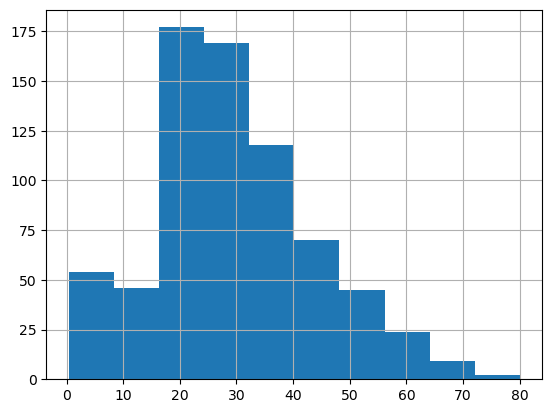

In [53]:
df_val['Age'].hist()
#It is a uniform distribution with some skew to the left

In [54]:
# In this cases, its recommended that we fill the values with the mode
df_val['Age'] = df_val['Age'].fillna(df_val['Age'].mode()[0])
df_testk['Age'] = df_testk['Age'].fillna(df_testk['Age'].mode()[0])
df_val['Age'].head()

PassengerId
1    22.0
2    38.0
3    26.0
4    35.0
5    35.0
Name: Age, dtype: float64

Now lets replace `Embarked`, since it's categorical, we can fill it with the mode 

In [55]:
df_val['Embarked'] = df_val['Embarked'].fillna(df_val['Age'].mode()[0])
df_val['Embarked'].isna().sum()


0

In [56]:
df_val.isna().sum() # We Don't have any NaNs left in df_val

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Now, we just fill the last test NaN

In [57]:
df_testk.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [58]:
df_testk['Fare'] = df_testk['Fare'].fillna(df_testk['Fare'].mode()[0])

We have officially no more NaNs in our dataframes 

Let's start working with our variables, ¿What are the correlations?

<Axes: >

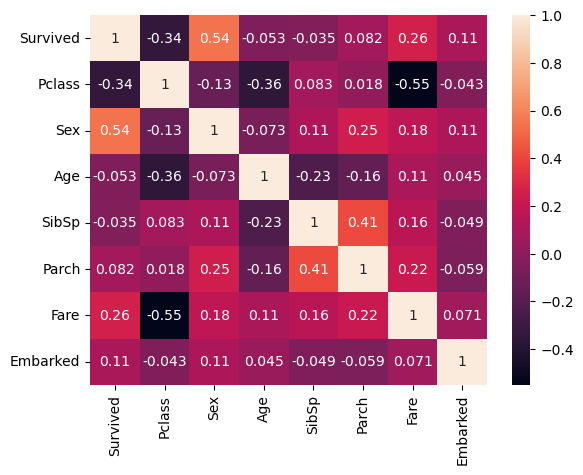

In [59]:
sns.heatmap(df_val.corr(), annot = True)

In [60]:
"""
As we have seen in the movie, the people who traveled alone is unlikely they will survive. I'm going to add
another column to see if the passenger was traveling with family or by himself.
"""
df_val['Family'] = df_val['Parch'] + df_val['SibSp'] 
df_testk['Family'] = df_testk['Parch'] + df_testk['SibSp'] 

In [61]:
df_val['Family'] = (df_val['Family'] > 0).astype(int)
df_testk['Family'] = (df_testk['Family'] > 0).astype(int)

Now we can drop `SibSp` and `Parch`

In [62]:
df_val = df_val.drop(['SibSp', 'Parch'], axis = 1)
df_testk = df_testk.drop(['SibSp', 'Parch'], axis = 1)

In [63]:
df_val.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
PassengerId,,,,,,,
1,0,3,0,22.0,7.2500,0.0,1
2,1,1,1,38.0,71.2833,1.0,1
3,1,3,1,26.0,7.9250,0.0,0
4,1,1,1,35.0,53.1000,0.0,1
5,0,3,0,35.0,8.0500,0.0,0


Let's make `Age` an binomial variable

In [64]:
df_val['Age'].describe()

count    891.000000
mean      28.566970
std       13.199572
min        0.420000
25%       22.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Let´s make `Age` a  binomial variable

In [65]:
df_val['Age'] = (df_val['Age'] >= 24).astype(int)
df_testk['Age'] = (df_testk['Age'] >= 24).astype(int)


#### Now we can make the test Dfs

In [66]:
X = df_val.drop('Survived', axis = 1)
y = df_val['Survived']
X_test = df_testk.drop('PassengerId', axis = 1)


In [67]:
from sklearn.neighbors import KNeighborsClassifier

#Create the object, lets remember that the default number of neighbors is 5
clf = KNeighborsClassifier() 

In [68]:
clf.fit(X, y)

KNeighborsClassifier()

In [69]:
df_testk['Survived'] = clf.predict(X_test)
df_testk.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family,Survived
0,892,3,0,1,7.8292,2,0,0
1,893,3,1,1,7.0000,0,1,0
2,894,2,0,1,9.6875,2,0,0
3,895,3,0,1,8.6625,0,0,0
4,896,3,1,0,12.2875,0,1,1


In [70]:
df_testk[['PassengerId', 'Survived']].to_csv(path_or_buf= '../data/processed/test_knn_sub.csv',  index = False)

### Testing

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 3)
x_train.shape, x_test.shape

((712, 6), (179, 6))

In [73]:
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [74]:
clf.score(x_test, y_test)

0.7374301675977654